In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error

In [2]:
pd.set_option('display.max_columns', 60)
myData=pd.read_csv('imputedData.csv')
myData.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#One hot encoding of categorical variables

#Create list with features to be dummified cols.
nonum_feats_names = ['Month','OperatingSystems','Browser','Region','VisitorType','Weekend']


dataModel = pd.concat([myData[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']],
                       pd.get_dummies(myData[nonum_feats_names].astype('category')),myData['Revenue']],axis=1)
                      
dataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 57 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
TrafficType                      12330 non-null int64
SpecialDay                       12330 non-null float64
Month_Aug                        12330 non-null uint8
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar    

In [4]:
#Label Encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
myData['Revenue'] = le.fit_transform(myData['Revenue'])
myData['Revenue'].value_counts()

myData['Revenue'].head()

# getting dependent and independent variables

x = dataModel
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = myData['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 56)
Shape of y: (12330,)


In [5]:
# splitting the data

from sklearn.model_selection import train_test_split

x_baseTrain, x_baseTest, y_baseTrain, y_baseTest = train_test_split(x, y, test_size = 0.3, random_state = 42)

# checking the shapes

print("Shape of x_train :", x_baseTrain.shape)
print("Shape of y_train :", y_baseTrain.shape)
print("Shape of x_test :", x_baseTest.shape)
print("Shape of y_test :", y_baseTest.shape)

Shape of x_train : (8631, 56)
Shape of y_train : (8631,)
Shape of x_test : (3699, 56)
Shape of y_test : (3699,)


In [6]:
#SCALING WITH STANDARD Z SCORE SCALER
#Scaling the data first fitting it and transforming the training set
#to later apply the fit to transform the test set.
from sklearn.preprocessing import StandardScaler

num_cols_names = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']

#Instantiate Satandard Scaler
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(x_baseTrain[num_cols_names]), 
                                     columns=num_cols_names, index= x_baseTrain.index)
#Integrate scaled values to the training set
for col in num_cols_names:
    x_baseTrain[col] = scaled_numfeats_train[col]
    
    
#Transform the numerical features inthe training dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(x_baseTest[num_cols_names]),
                                    columns=num_cols_names, index= x_baseTest.index)
#Integrate scaled values to the test set
for col in num_cols_names:
    x_baseTest[col] = scaled_numfeats_test[col]

C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit. applying this feature selection on corr fixed data

In [7]:
x_baseTrain.drop(labels=['Browser_1','BounceRates','ProductRelated','VisitorType_Returning_Visitor'], 
                 axis=1, inplace=True)
x_baseTest.drop(labels=['Browser_1','BounceRates','ProductRelated','VisitorType_Returning_Visitor'], 
                axis=1, inplace=True)

x_baseTrain.shape, x_baseTest.shape

C:\Users\neera\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((8631, 52), (3699, 52))

In [14]:
# The first step to determine feature importance by feature shuffling
# is to build the machine learning model for which we want to 
# select features

# In this case, I will build Random Forests, but remember that 
# you can use this procedure for any other machine learning algorithm

# I build few and shallow trees to avoid overfitting
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=2909, n_jobs=4)

rf.fit(x_baseTrain, y_baseTrain)

# print roc-auc in train and testing sets
print('train auc score: ',roc_auc_score(y_baseTrain, (rf.predict_proba(x_baseTrain)[:, 1])))
print('test auc score: ',roc_auc_score(y_baseTest, (rf.predict_proba(x_baseTest)[:, 1])))

train auc score:  0.8967925216437023
test auc score:  0.8932953849579692


In [26]:
# in this cell, I will shuffle one by one, each feature of the dataset
# and then use the dataset with the shuffled variable to make predictions
# using the random forests I trained in the previous cell

# overall train roc-auc: using all the features
train_auc = roc_auc_score(y_baseTrain, (rf.predict_proba(x_baseTrain)[:, 1]))

# dictionary to capture the features and the drop in auc that they
# cause when shuffled
feature_dict = {}

# selection  logic
for feature in x_baseTrain.columns:
    X_train_c = x_baseTrain.copy()
    
    # shuffle individual feature
    X_train_c[feature] = X_train_c[feature].sample(frac=1).reset_index(
        drop=True)
    
    # make prediction with shuffled feature and calculate roc-auc
    shuff_auc = roc_auc_score(y_baseTrain,
                              (rf.predict_proba(X_train_c.fillna(0)))[:, 1])
    
    # save the drop in roc-auc
    feature_dict[feature] = (train_auc - shuff_auc)

In [27]:
# let's have a look at the generated dictionary
feature_dict

{'Administrative': -0.0018167223362430818,
 'Administrative_Duration': -0.005170722661482108,
 'Informational': -0.002948890826433681,
 'Informational_Duration': -0.003193231166108812,
 'ProductRelated_Duration': -0.002490534253185017,
 'ExitRates': 0.013109933416486474,
 'PageValues': 0.22948111651097203,
 'TrafficType': 0.0005185936111323786,
 'SpecialDay': 0.0005714295112556611,
 'Month_Aug': 3.844479892245456e-05,
 'Month_Dec': 4.928952161309397e-05,
 'Month_Feb': 2.0044748101133436e-05,
 'Month_Jul': 1.4236910830911498e-05,
 'Month_June': 2.353972982149788e-05,
 'Month_Mar': 0.00013830876189868668,
 'Month_May': 0.000831394475091729,
 'Month_Nov': 0.017324829974279088,
 'Month_Oct': 0.0002629459776564147,
 'Month_Sep': 0.00015557808333965806,
 'OperatingSystems_1': 0.0,
 'OperatingSystems_2': 0.0003160388617297061,
 'OperatingSystems_3': 0.00022989784168436778,
 'OperatingSystems_4': 0.0,
 'OperatingSystems_5': -2.6726330801807308e-06,
 'OperatingSystems_6': -3.5977753002347512e-0

In [34]:
# Now I will transform the dictionary into a pandas dataframe
# for easy manipulation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

feature_importance = pd.Series(feature_dict).reset_index()
feature_importance.columns = ['feature', 'auc_drop']
feature_importance.head(52)

,feature,auc_drop
0,Administrative,-0.00182
1,Administrative_Duration,-0.00517
2,Informational,-0.00295
3,Informational_Duration,-0.00319
4,ProductRelated_Duration,-0.00249
5,ExitRates,0.01311
6,PageValues,0.22948
7,TrafficType,0.00052
8,SpecialDay,0.00057
9,Month_Aug,0.00004


In [35]:
# Now I will sort the dataframe according to the drop in performance
# caused by feature shuffling

feature_importance.sort_values(by=['auc_drop'], ascending=False, inplace=True)

In [36]:
# visualise the top 25 features that caused the major drop
# in roc-auc (aka model performance)

feature_importance.head(25)

,feature,auc_drop
6,PageValues,0.22948
16,Month_Nov,0.01732
5,ExitRates,0.01311
48,VisitorType_New_Visitor,0.00311
15,Month_May,0.00083
8,SpecialDay,0.00057
7,TrafficType,0.00052
20,OperatingSystems_2,0.00032
17,Month_Oct,0.00026
21,OperatingSystems_3,0.00023


In [37]:
# visualise the features that caused virtually 
# no drop in performance

feature_importance.tail(27)

,feature,auc_drop
27,Browser_2,0.00000
44,Region_6,0.00000
41,Region_3,0.00000
40,Region_2,0.00000
45,Region_7,0.00000
34,Browser_9,0.00000
46,Region_8,0.00000
49,VisitorType_Other,0.00000
35,Browser_10,0.00000
26,OperatingSystems_8,0.00000


In [38]:
# original number of features (rows in this case)
feature_importance.shape[0]

52

In [39]:
# number of features that cause a drop in performance
# when shuffled

feature_importance[feature_importance.auc_drop>0].shape[0]

27

Only 27 out of the 52 features caused a drop in the performance of the random forests when their values were permuted. This means that we could select those features and discard the rest(25), and should keep the original random forest performance.

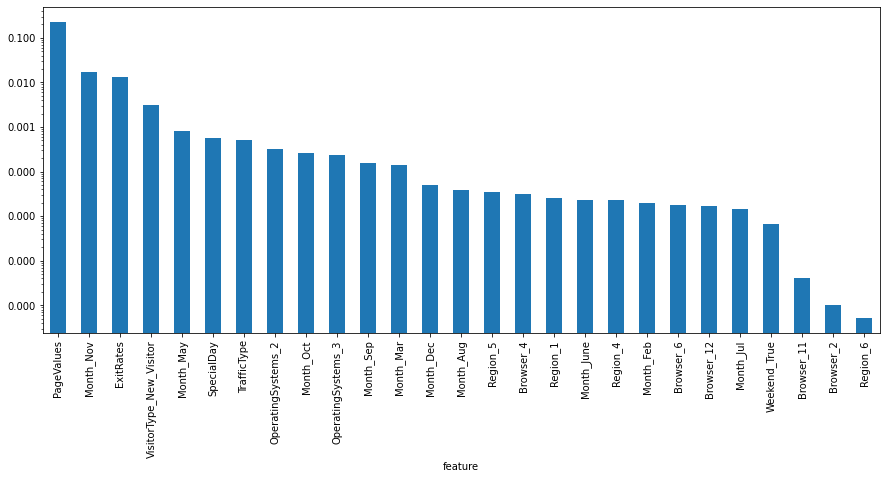

In [42]:
# and now let's plot the distribution of importances
# for those features that are actually important

# capture the important features in a series for visualisation
temp = pd.Series(feature_importance[feature_importance.auc_drop>0]['auc_drop'])
temp.index = pd.Series(feature_importance[feature_importance.auc_drop>0]['feature'])

pd.Series(temp).plot.bar(figsize=(15,6))
plt.yscale("log")
from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()

In [44]:
# Now let's build a random forests only with the 26 selected features

# capture the 27 selected features
selected_features = feature_importance[feature_importance.auc_drop>0]['feature']

# train a new random forests using only the selected features
rf = RandomForestClassifier(
    n_estimators=100, max_depth=2, random_state=2909, n_jobs=4)

rf.fit(x_baseTrain[selected_features], y_baseTrain)

# print roc-auc in train and testing sets
print('train auc score: ',
      roc_auc_score(y_baseTrain, (rf.predict_proba(x_baseTrain[selected_features])[:, 1])))
print('test auc score: ',
      roc_auc_score(y_baseTest, (rf.predict_proba(x_baseTest[selected_features])[:, 1])))

train auc score:  0.9164767212630782
test auc score:  0.9128686744975785


As you can see, the random forests with the selected features show a better(from 89 to 91) performance to the random forests built using all of the features. And yet, provides a simpler, faster and more reliable model, for implementation in a live scenario.